# Data Preprocessing

In [1]:
df= read.csv("Social_Network_Ads.csv")

In [2]:
head(df)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [3]:
dataset <- df[3:5]

In [5]:
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [6]:
dataset$Purchased <- as.factor(dataset$Purchased)

In [7]:
data <- sample(nrow(dataset),nrow(dataset)*.75)

In [10]:
training_data <- dataset[data,]
test_data <- dataset[-data,]

In [11]:
dim(training_data)
dim(test_data)

[1] 300   3

[1] 100   3

In [23]:
training_data[-3] <- scale(training_data[-3])

In [25]:
test_data[-3] <- scale(test_data[-3])

# Building Model

In [26]:
library(e1071)

In [29]:
svm.fit <- svm(Purchased ~., data = training_data,type = 'C-classification',kernel = 'linear')

In [30]:
svm.fit


Call:
svm(formula = Purchased ~ ., data = training_data, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  111


# Visualizing SVM plot

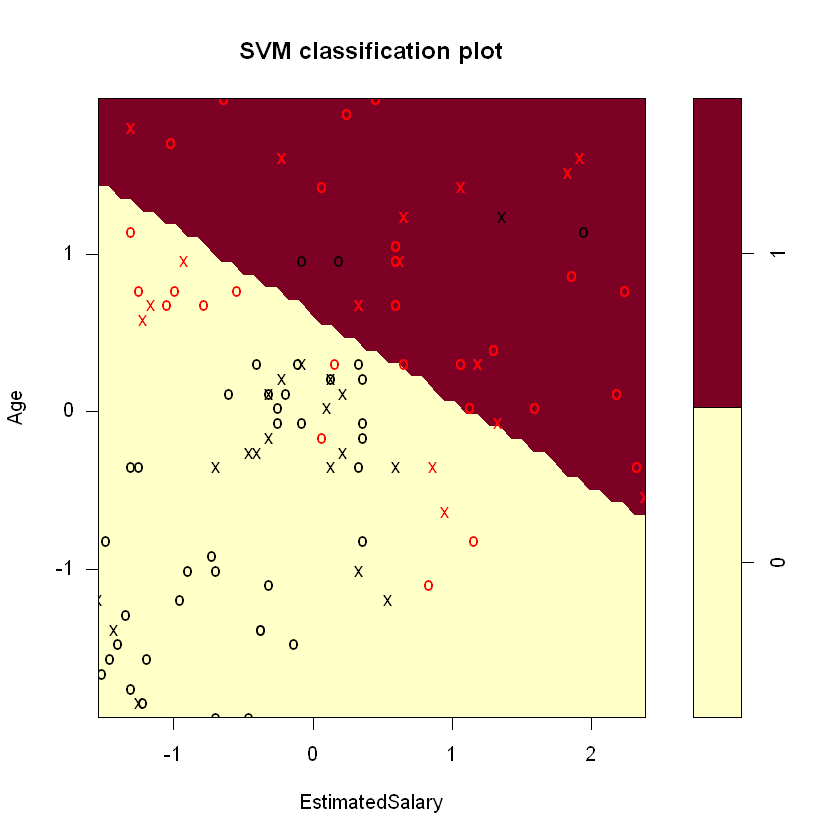

In [43]:
plot(svm.fit,data=test_data)

In [34]:
prediction <- predict(svm.fit,test_data[-3])

In [39]:
library(caret)
library(ggplot2)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Confusion Matrix & Accuracy

In [40]:
confusionMatrix(prediction,test_data[,3])

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 53 15
         1  4 28
                                          
               Accuracy : 0.81            
                 95% CI : (0.7193, 0.8816)
    No Information Rate : 0.57            
    P-Value [Acc > NIR] : 3.45e-07        
                                          
                  Kappa : 0.5998          
                                          
 Mcnemar's Test P-Value : 0.02178         
                                          
            Sensitivity : 0.9298          
            Specificity : 0.6512          
         Pos Pred Value : 0.7794          
         Neg Pred Value : 0.8750          
             Prevalence : 0.5700          
         Detection Rate : 0.5300          
   Detection Prevalence : 0.6800          
      Balanced Accuracy : 0.7905          
                                          
       'Positive' Class : 0               
                                    